In [1]:
#tratamiento de datos
import pandas as pd

#configuracion de visualizacion
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

#exploracion de archivos
import sys
sys.path.append('../')

#funciones personalizadas
from SRC import sp_eda as se
from SRC import sp_limpieza as sl
from SRC import sp_nulos as sn
from SRC import sp_visualizaciones as sv

# GESTION DE NULOS

In [2]:
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'review_creation_date']

df = pd.read_csv('../datos/olist_limpios.csv', parse_dates=date_cols)
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

### Vista preliminar de nulos

In [3]:
df.isnull().mean()*100

order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.153932
order_delivered_carrier_date     1.754451
order_delivered_customer_date    2.933049
order_estimated_delivery_date    0.000000
price                            0.754822
freight_value                    0.754822
payment_type                     0.000927
payment_installments             0.000927
payment_value                    0.000927
review_score                     0.785423
review_creation_date             1.203635
customer_zip_code_prefix         0.000000
customer_state                   0.000000
product_name_length              2.178227
product_description_length       2.178227
product_photos_qty               2.178227
product_weight_g                 0.770586
seller_zip_code_prefix           0.754822
seller_state                     0.754822
product_category_name_english    2.199555
order_id                         0.000000
customer_id                      0

### Creacion de Data Frame de nulos

In [4]:
df_nulos = df.loc[:,df.isnull().sum()>0]
df_nulos.sample(5)

order_approved_at order_delivered_carrier_date  \
78810 2017-12-05 16:21:24          2017-12-07 02:23:15   
39906 2017-09-09 05:04:40          2017-09-12 17:58:47   
95337 2017-11-25 21:56:05                          NaT   
51248 2018-05-11 10:17:33          2018-05-14 14:47:00   
95766 2018-07-26 14:35:21          2018-07-27 14:21:00   

      order_delivered_customer_date   price  freight_value payment_type  \
78810           2017-12-18 20:03:48  166.99          40.16  credit_card   
39906           2017-09-27 20:36:20   17.99          16.11    bank_slip   
95337                           NaT  114.90          16.24  credit_card   
51248           2018-05-22 05:04:07   90.00          18.88  credit_card   
95766           2018-08-01 23:18:51   39.00          15.37  credit_card   

       payment_installments  payment_value  review_score review_creation_date  \
78810                   2.0         207.15           5.0           2017-12-19   
39906                   1.0          68.20           5.0           2017-09-28   
95337                   4.0         131.14           1.0           2017-12-29   
51248                   7.0         108.88           5.0           2018-05-22   
95766                   5.0         108.74           5.0           2018-08-02   

       product_name_length  product_description_length  product_photos_qty  \
78810                 40.0                      1456.0                 1.0   
39906                 51.0                        89.0                 1.0   
95337                 48.0                       379.0                 1.0   
51248                 48.0                       594.0                 1.0   
95766                 57.0                       722.0                 4.0   

       product_weight_g  seller_zip_code_prefix seller_state  \
78810            2425.0                  4403.0           sp   
39906             700.0                 14940.0           sp   
95337             250.0                 72251.0           df   
51248            1850.0                 71200.0           df   
95766             500.0                  4782.0           sp   

      product_category_name_english                        product_id  \
78810                    cool_stuff  165f86fe8b799a708a20ee4ba125c289   
39906                bed_bath_table  658fc5dfe583ae91ca3268d4d3762a6e   
95337                          baby  3e2ab11261c392c92d33ea7f9fb8de3a   
51248                 health_beauty  7fb04722aba7a2b632bac8f9819796f3   
95766                sports_leisure  995e25d9b46dee183004994645768d95   

                              seller_id                         review_id  
78810  7ddcbb64b5bc1ef36ca8c151f6ec77df  396d1c64bf05083e68c5559cd5bf1b26  
39906  d1c281d3ae149232351cd8c8cc885f0d  aff636c5cbff18f20a9d8b5786733325  
95337  b5abf4f36adc043117b4fca82c22984c  311fb1433e475882e998826e6679a56a  
51248  f3b80352b986ab4d1057a4b724be19d0  d374d853a0c161d53de24208ace8b150  
95766  955fee9216a65b617aa5c0531780ce60  bbaaa4d4017fdab7c0632fc9f864a5f7

In [5]:
df_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107840 entries, 0 to 107839
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_approved_at              107674 non-null  datetime64[ns]
 1   order_delivered_carrier_date   105948 non-null  datetime64[ns]
 2   order_delivered_customer_date  104677 non-null  datetime64[ns]
 3   price                          107026 non-null  float64       
 4   freight_value                  107026 non-null  float64       
 5   payment_type                   107839 non-null  object        
 6   payment_installments           107839 non-null  float64       
 7   payment_value                  107839 non-null  float64       
 8   review_score                   106993 non-null  float64       
 9   review_creation_date           106542 non-null  datetime64[ns]
 10  product_name_length            105491 non-null  float64       
 11  

## Gestión de nulos de columnas categoricas

Comprobación de si alguna categoría sobresale sobre las otras

In [6]:
sn.estadist_col_cat(df_nulos)

PAYMENT_TYPE
payment_type
credit_card    74.386128
bank_slip      19.099592
voucher         5.027819
debit_card      1.482752
not_defined     0.002782
Name: count, dtype: float64
------------------------
SELLER_STATE
seller_state
sp    70.577708
mg     7.917285
pr     7.637240
rj     4.234050
sc     3.617396
rs     1.949184
df     0.802114
ba     0.561016
go     0.469214
pe     0.395030
ma     0.372774
es     0.311573
mt     0.131677
ce     0.089021
rn     0.050074
ms     0.046365
pb     0.039874
ro     0.012982
pi     0.011128
se     0.008346
pa     0.007418
am     0.002782
ac     0.000927
Name: count, dtype: float64
------------------------
PRODUCT_CATEGORY_NAME_ENGLISH
product_category_name_english
bed_bath_table                             10.083457
health_beauty                               8.631306
sports_leisure                              7.558420
computers_accessories                       6.643175
furniture_decor                             6.643175
housewares              

- payment_type tiene la categoría credit_card que sobresale con un 74.38%
- seller_state tiene la categoría sp que sobresale con un 70.57% 

## Visualización columnas categóricas

- Escluyo de la visualización los las columnas ID ya que no tiene sentido 

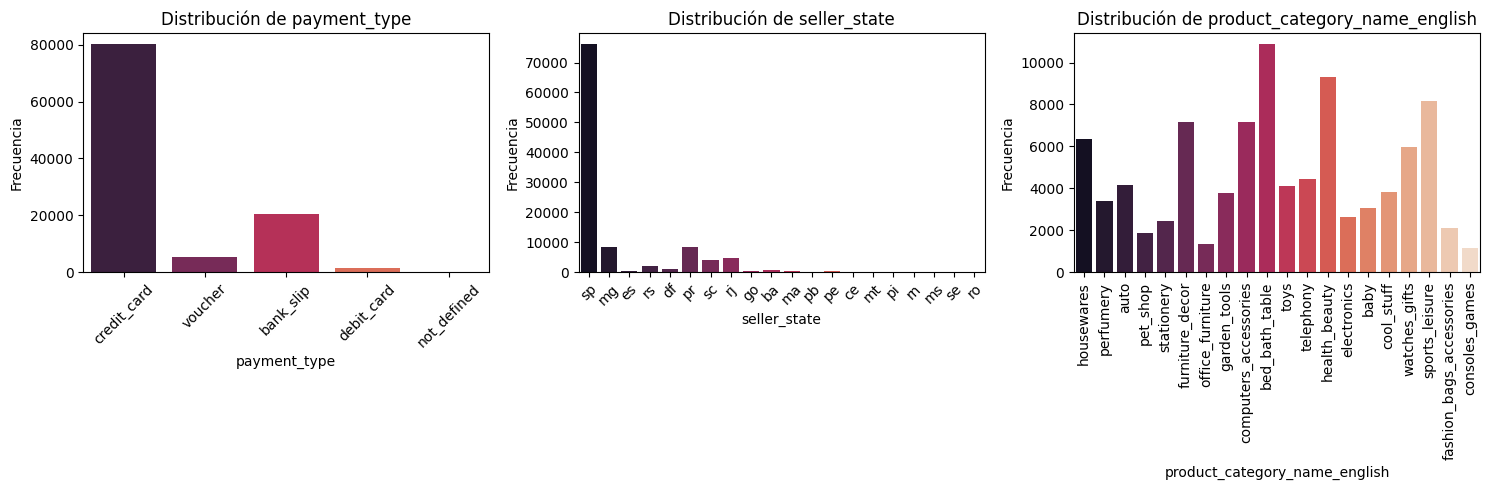

In [7]:
sv.subplot_col_cat(df_nulos)

- payment_type: tiene la categoría credit_card que sobresale con un 74.38% y el porcentaje de nulos es bajo  0.000927% asi que podermo imputar con la moda.
                tiene la categoría not_defined con solo 3 entradas puede ser eliminada
- seller_stare: tiene la categoría sp que sobresale con un 70.57% y el porcentahe de nulos es bajo 0.75% asi que podemos imputar con la moda.
- product_category_name_english: ninguna categoría destaca y tiene un número más importante de nulos 2.19% así que crearemos una nueva categoría   
  "unknown"

## Imputación de nulos en columnas categóricas

In [10]:
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)
df = df[df['payment_type'] != 'not_defined']
df['seller_state'].fillna(df['seller_state'].mode()[0], inplace=True)
df['product_category_name_english'].fillna('unknown', inplace=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_18692\2224351399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_18692\2224351399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [11]:
df.isnull().mean()*100

order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.151154
order_delivered_carrier_date     1.751718
order_delivered_customer_date    2.930349
order_estimated_delivery_date    0.000000
price                            0.752061
freight_value                    0.752061
payment_type                     0.000000
payment_installments             0.000927
payment_value                    0.000927
review_score                     0.785445
review_creation_date             1.203668
customer_zip_code_prefix         0.000000
customer_state                   0.000000
product_name_length              2.175506
product_description_length       2.175506
product_photos_qty               2.175506
product_weight_g                 0.767826
seller_zip_code_prefix           0.752061
seller_state                     0.000000
product_category_name_english    0.000000
order_id                         0.000000
customer_id                      0